In [90]:
import astropy.constants as const
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from plotting import label_axes
from utils import GeV_over_c

# Primary CR distribution

In [91]:
F_UNIT = u.pc ** (-3) * GeV_over_c ** (-3)
Q_UNIT = F_UNIT / u.kyr

In [92]:
# injection
gamma = 4.3  # must bee >4 to avoid logarithmic divergence
eps_CR = 0.1
E_SN = 1e52 * u.erg
R_SN = 1 / (50 * u.yr)
R_d = 10 * u.kpc
E0 = 5 * u.GeV
log10E0 = np.log10(E0.to(u.GeV).value)

Q0 = ((gamma - 4) * eps_CR * E_SN * R_SN * const.c**3) / (4 * np.pi**2 * R_d**2 * E0**4)
Q = lambda E: Q0 * (E / E0) ** (-gamma)

In [93]:
# galactic environment
D0 = 1e28 * u.cm**2 / u.s
delta = 1 / 3
D = lambda E: D0 * (E.to(u.GeV).value) ** delta

H = 5 * u.kpc
h = 100 * u.pc
n_d = 1 * u.cm**(-3)
n_avg = n_d * h / H

chi = lambda E: (const.m_p * n_avg * const.c * (H**2) / D(E)).to(u.g / u.cm**2)

In [94]:
# particle physics
sigma_p = 45 * u.mbarn
sigma = lambda A: sigma_p * A ** (2 / 3)

chi_crit = lambda A: const.m_p / sigma(A)

In [95]:
nuclei = ((1, "H"), (12, "C"), (16, "O"), (56, "Fe"))
cmap = matplotlib.colormaps["turbo"]

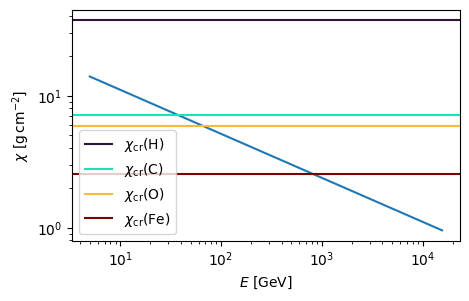

In [96]:
fig, ax = plt.subplots(figsize=(5, 3))

E_grid = np.logspace(log10E0, 6 * log10E0, 100) * u.GeV
ax.loglog(E_grid, chi(E_grid))

for idx, (A, nucl) in enumerate(nuclei):
    ax.axhline(
        chi_crit(A),
        label=f"$ \\chi_{{\\mathrm{{cr}}}}(\\mathrm{{{nucl}}}) $",
        color=cmap(idx / (len(nuclei) - 1)),
    )

label_axes(ax, "E", "\\chi")
ax.legend()
plt.show()

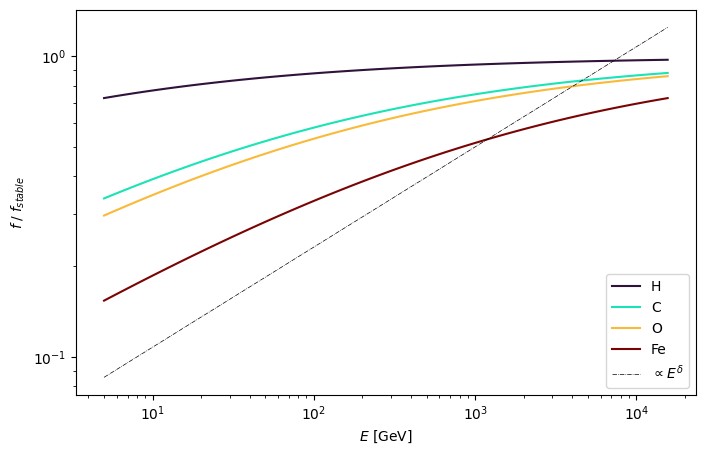

In [110]:
fig, ax = plt.subplots(figsize=(8, 5))

E_grid = np.logspace(log10E0, 6 * log10E0, 100) * u.GeV

for idx, (A, nucl) in enumerate(nuclei):
    f = (Q(E_grid) / ((2 * D(E_grid) / H) * (1 + chi(E_grid) / chi_crit(A)))).to(F_UNIT)
    f0 = (Q(E_grid) / ((2 * D(E_grid) / H))).to(F_UNIT)
    ax.loglog(
        E_grid,
        f / f0,
        label=nucl,
        color=cmap(idx / (len(nuclei) - 1)),
    )

ax.plot(
    E_grid,
    5e-2 * (E_grid**delta).value,
    color="k",
    linestyle="-.",
    linewidth=0.5,
    label="$ \\propto E^\\delta $",
)
cmap = matplotlib.colormaps["turbo"]
label_axes(ax, "E", "f \\; / \\; f_{stable}")
ax.legend()
plt.show()